In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import math
import scipy as sp
from scipy.stats import kstest
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [2]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from filter_data2 import *
from filter_data3 import *
from select_data import *
from select_data_edge import *

#2) Distributions
from Gaussian import *
from Lognormal import *


#3) Other edges
from underscore_prefix import *
from underscore_suffix import *

from edge_direction import *
from edge_plot import *
from edge_plot_gaussian import *
from edge_plot_lognormal import *


print("done")

done


In [3]:
#1) Import filtered data from Excel
df = pd.read_excel("n_robots.xlsx")
#2) Final filtering - Get rid of is_final = TRUE & n_robots != 1
df = filter_data3(df)
print("done")

done


In [21]:
df.sort_values("n_robots", ascending = False)

,Unnamed: 0,origin,target,edge_id,is_final,operation_time,start,finish,n_robots
316,0,WayPoint112,WayPoint82,WayPoint112_WayPoint82,False,5.192,2021-02-23 20:02:28.981,2021-02-23 20:02:34.101,1
8353,8246,WayPoint102,WayPoint109,WayPoint102_WayPoint109,False,12.666,2021-02-26 02:51:16.846,2021-02-26 02:51:21.966,1
8287,8179,WayPoint109,WayPoint108,WayPoint109_WayPoint108,False,6.545,2021-02-26 02:18:43.463,2021-02-26 02:18:48.583,1
8288,8180,WayPoint106,WayPoint107,WayPoint106_WayPoint107,False,14.826,2021-02-26 02:18:56.655,2021-02-26 02:19:01.775,1
8289,8181,WayPoint107,WayPoint108,WayPoint107_WayPoint108,False,14.453,2021-02-26 02:19:20.539,2021-02-26 02:19:25.659,1
...,...,...,...,...,...,...,...,...,...
4322,4108,WayPoint71,WayPoint70,WayPoint71_WayPoint70,False,10.123,2021-02-25 15:19:51.284,2021-02-25 15:19:56.404,1
4323,4109,WayPoint72,WayPoint71,WayPoint72_WayPoint71,False,16.610,2021-02-25 15:20:08.877,2021-02-25 15:20:13.997,1
4325,4111,WayPoint71,WayPoint70,WayPoint71_WayPoint70,False,10.273,2021-02-25 15:20:14.436,2021-02-25 15:20:19.556,1
4326,4112,WayPoint61,WayPoint68,WayPoint61_WayPoint68,False,12.291,2021-02-25 15:20:22.084,2021-02-25 15:20:27.204,1


# 2) Does the direction matter?
- i.e. does it matter which is the origin & which is the target node?
- Short answer: YES
- Note: ignore the error message for the code

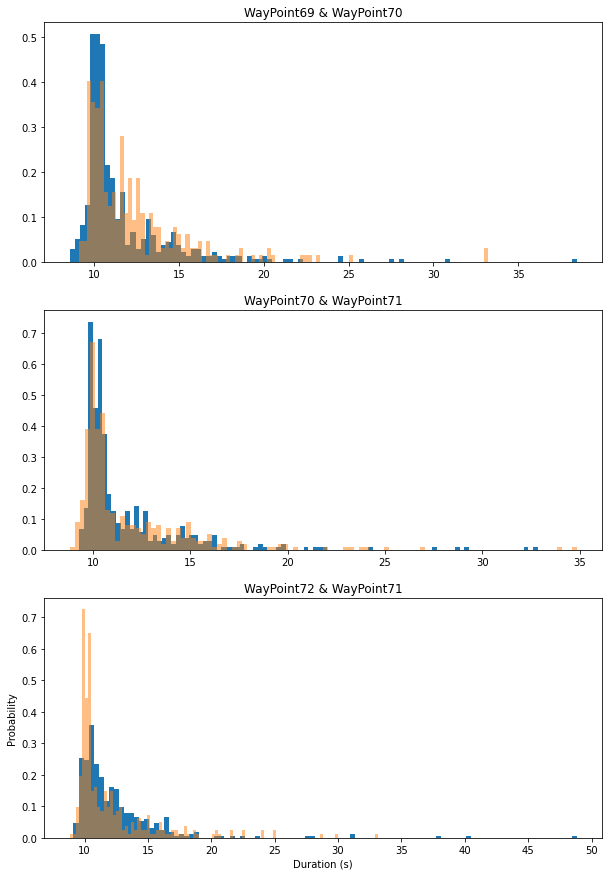

In [4]:
count = edge_direction(df, n_plots = 3)

In [7]:
#2 sample KS test
count.to_csv('edge_direction.csv')
count.head(4)

,edge_id,samples,origin,target,ks statistic,ks p-value,reversible
0,WayPoint69_WayPoint70,448,WayPoint69,WayPoint70,0.184908,1.74663e-05,False
1,WayPoint70_WayPoint71,443,WayPoint70,WayPoint71,0.0923853,0.0555223,True
2,WayPoint72_WayPoint71,388,WayPoint72,WayPoint71,0.205769,3.82249e-07,False
3,WayPoint71_WayPoint70,382,WayPoint71,WayPoint70,0.0923853,0.0555223,True


In [8]:
#How many edges are reversible? (i.e. the forward and backward transition have the same distribution)
n_reversible = 0
reversible_edges = []
n_total = len(count["edge_id"])
for i in range(n_total):
    if count["reversible"][i] == True:
        n_reversible += 1
        reversible_edges.append(count["edge_id"][i])
print(n_reversible, "out of", n_total)


16 out of 89


# 3) Do different edges have differently-shaped distributions
- Do the distributions all look similar?
- Not all edges have enough data to infer a shape from
- Most edges with enough data look like WayPoint69_WayPoint70
- There were a few edges that looked multimodal: WayPoint110_WayPoint68, WayPoint112_WayPoint82, WayPoint111_WayPoint75

(131, 2)


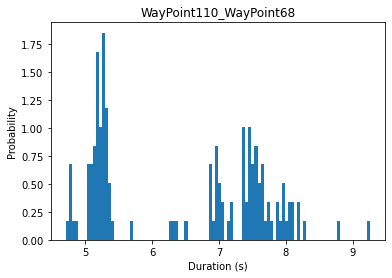

In [16]:
#1) Select data of interest
wp1 = "WayPoint110"
wp2 = "WayPoint68"
edge = str(wp1) + "_" + str(wp2)
subset = select_data_edge(df, edge)

#df.head(2)

#2) plot
t_op = subset["operation_time"]
plt.hist(t_op, density = True, bins = 100);
plt.xlabel("Duration (s)")
plt.ylabel("Probability")
plt.title(edge)

print(subset.shape)

(0, 2)


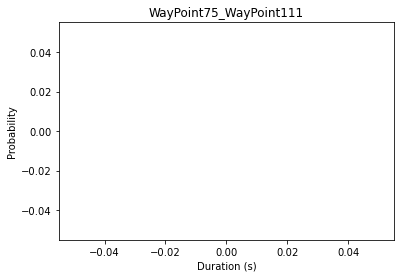

In [19]:
#1) Select data of interest
wp1 = "WayPoint75"
wp2 = "WayPoint111"
edge = str(wp1) + "_" + str(wp2)
subset = select_data_edge(df, edge)

#df.head(2)

#2) plot
t_op = subset["operation_time"]
plt.hist(t_op, density = True, bins = 100);
plt.xlabel("Duration (s)")
plt.ylabel("Probability")
plt.title(edge)

print(subset.shape)

'Done'

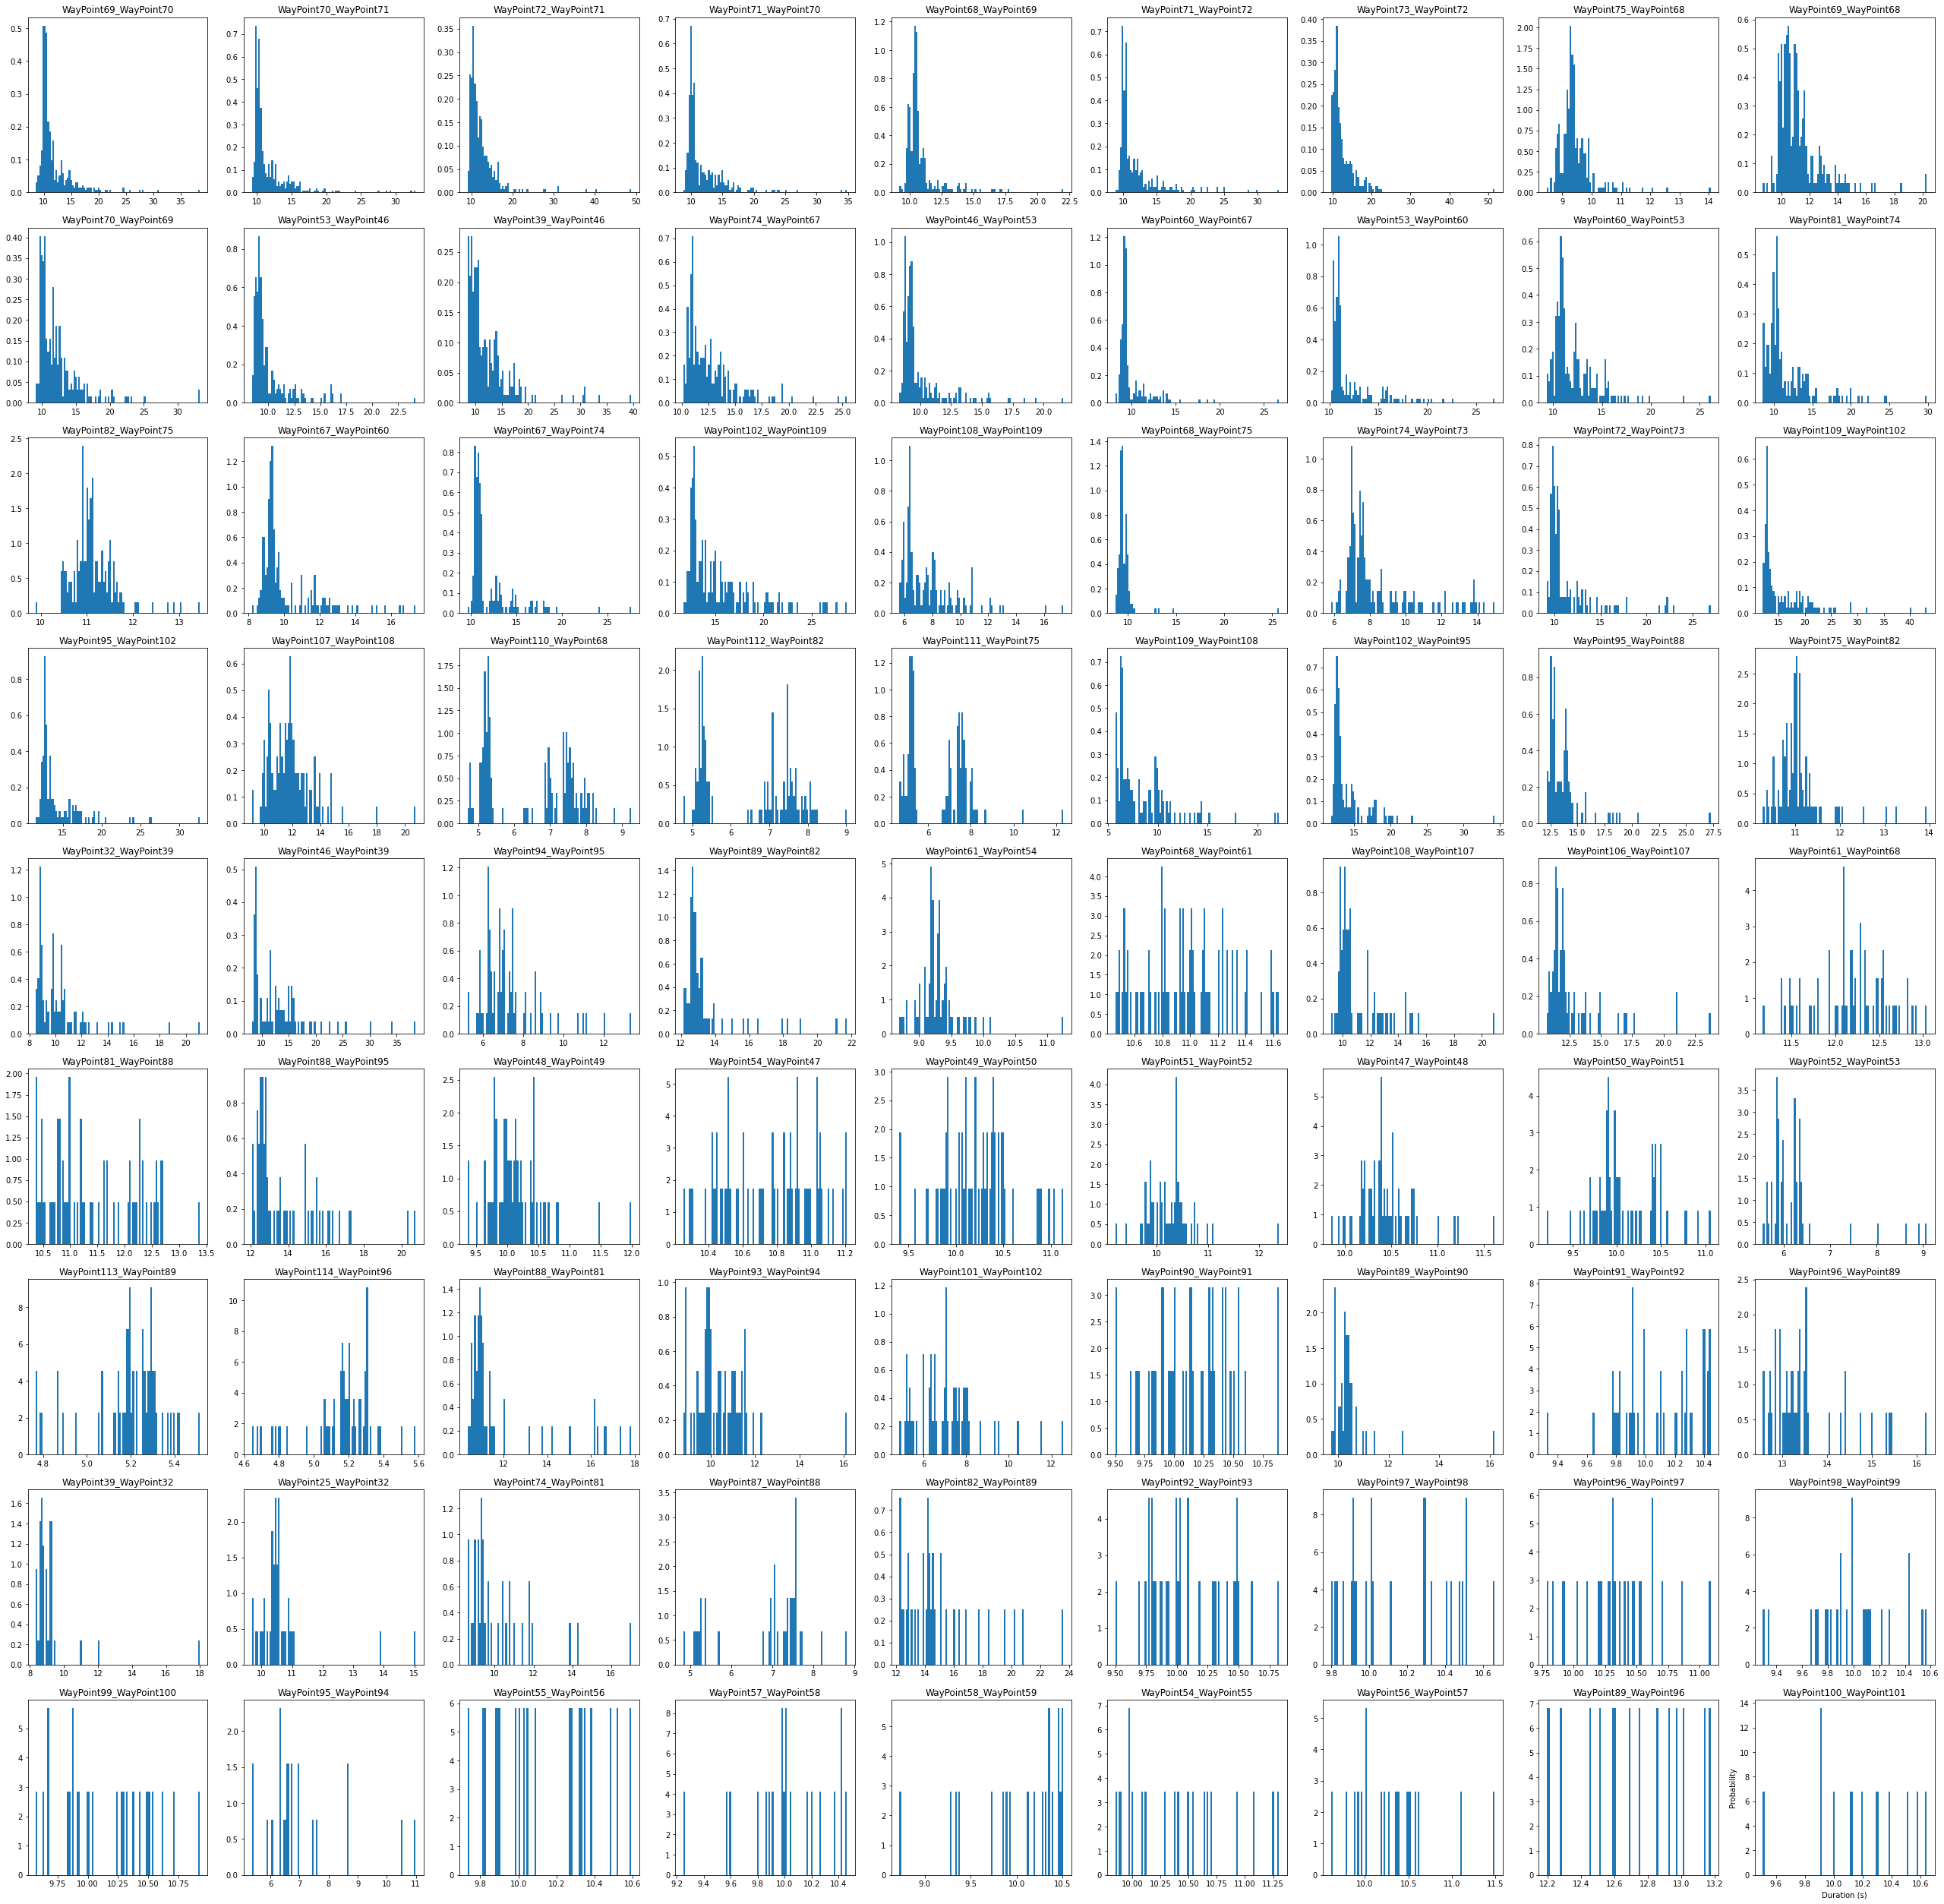

In [13]:
#plot duration distributions with the most data
edge_plot(df, count, n_rows = 9, n_cols = 9)

# 4) Try fitting models to these edges

## 4a) Gaussian
- Not a good fit

'Done'

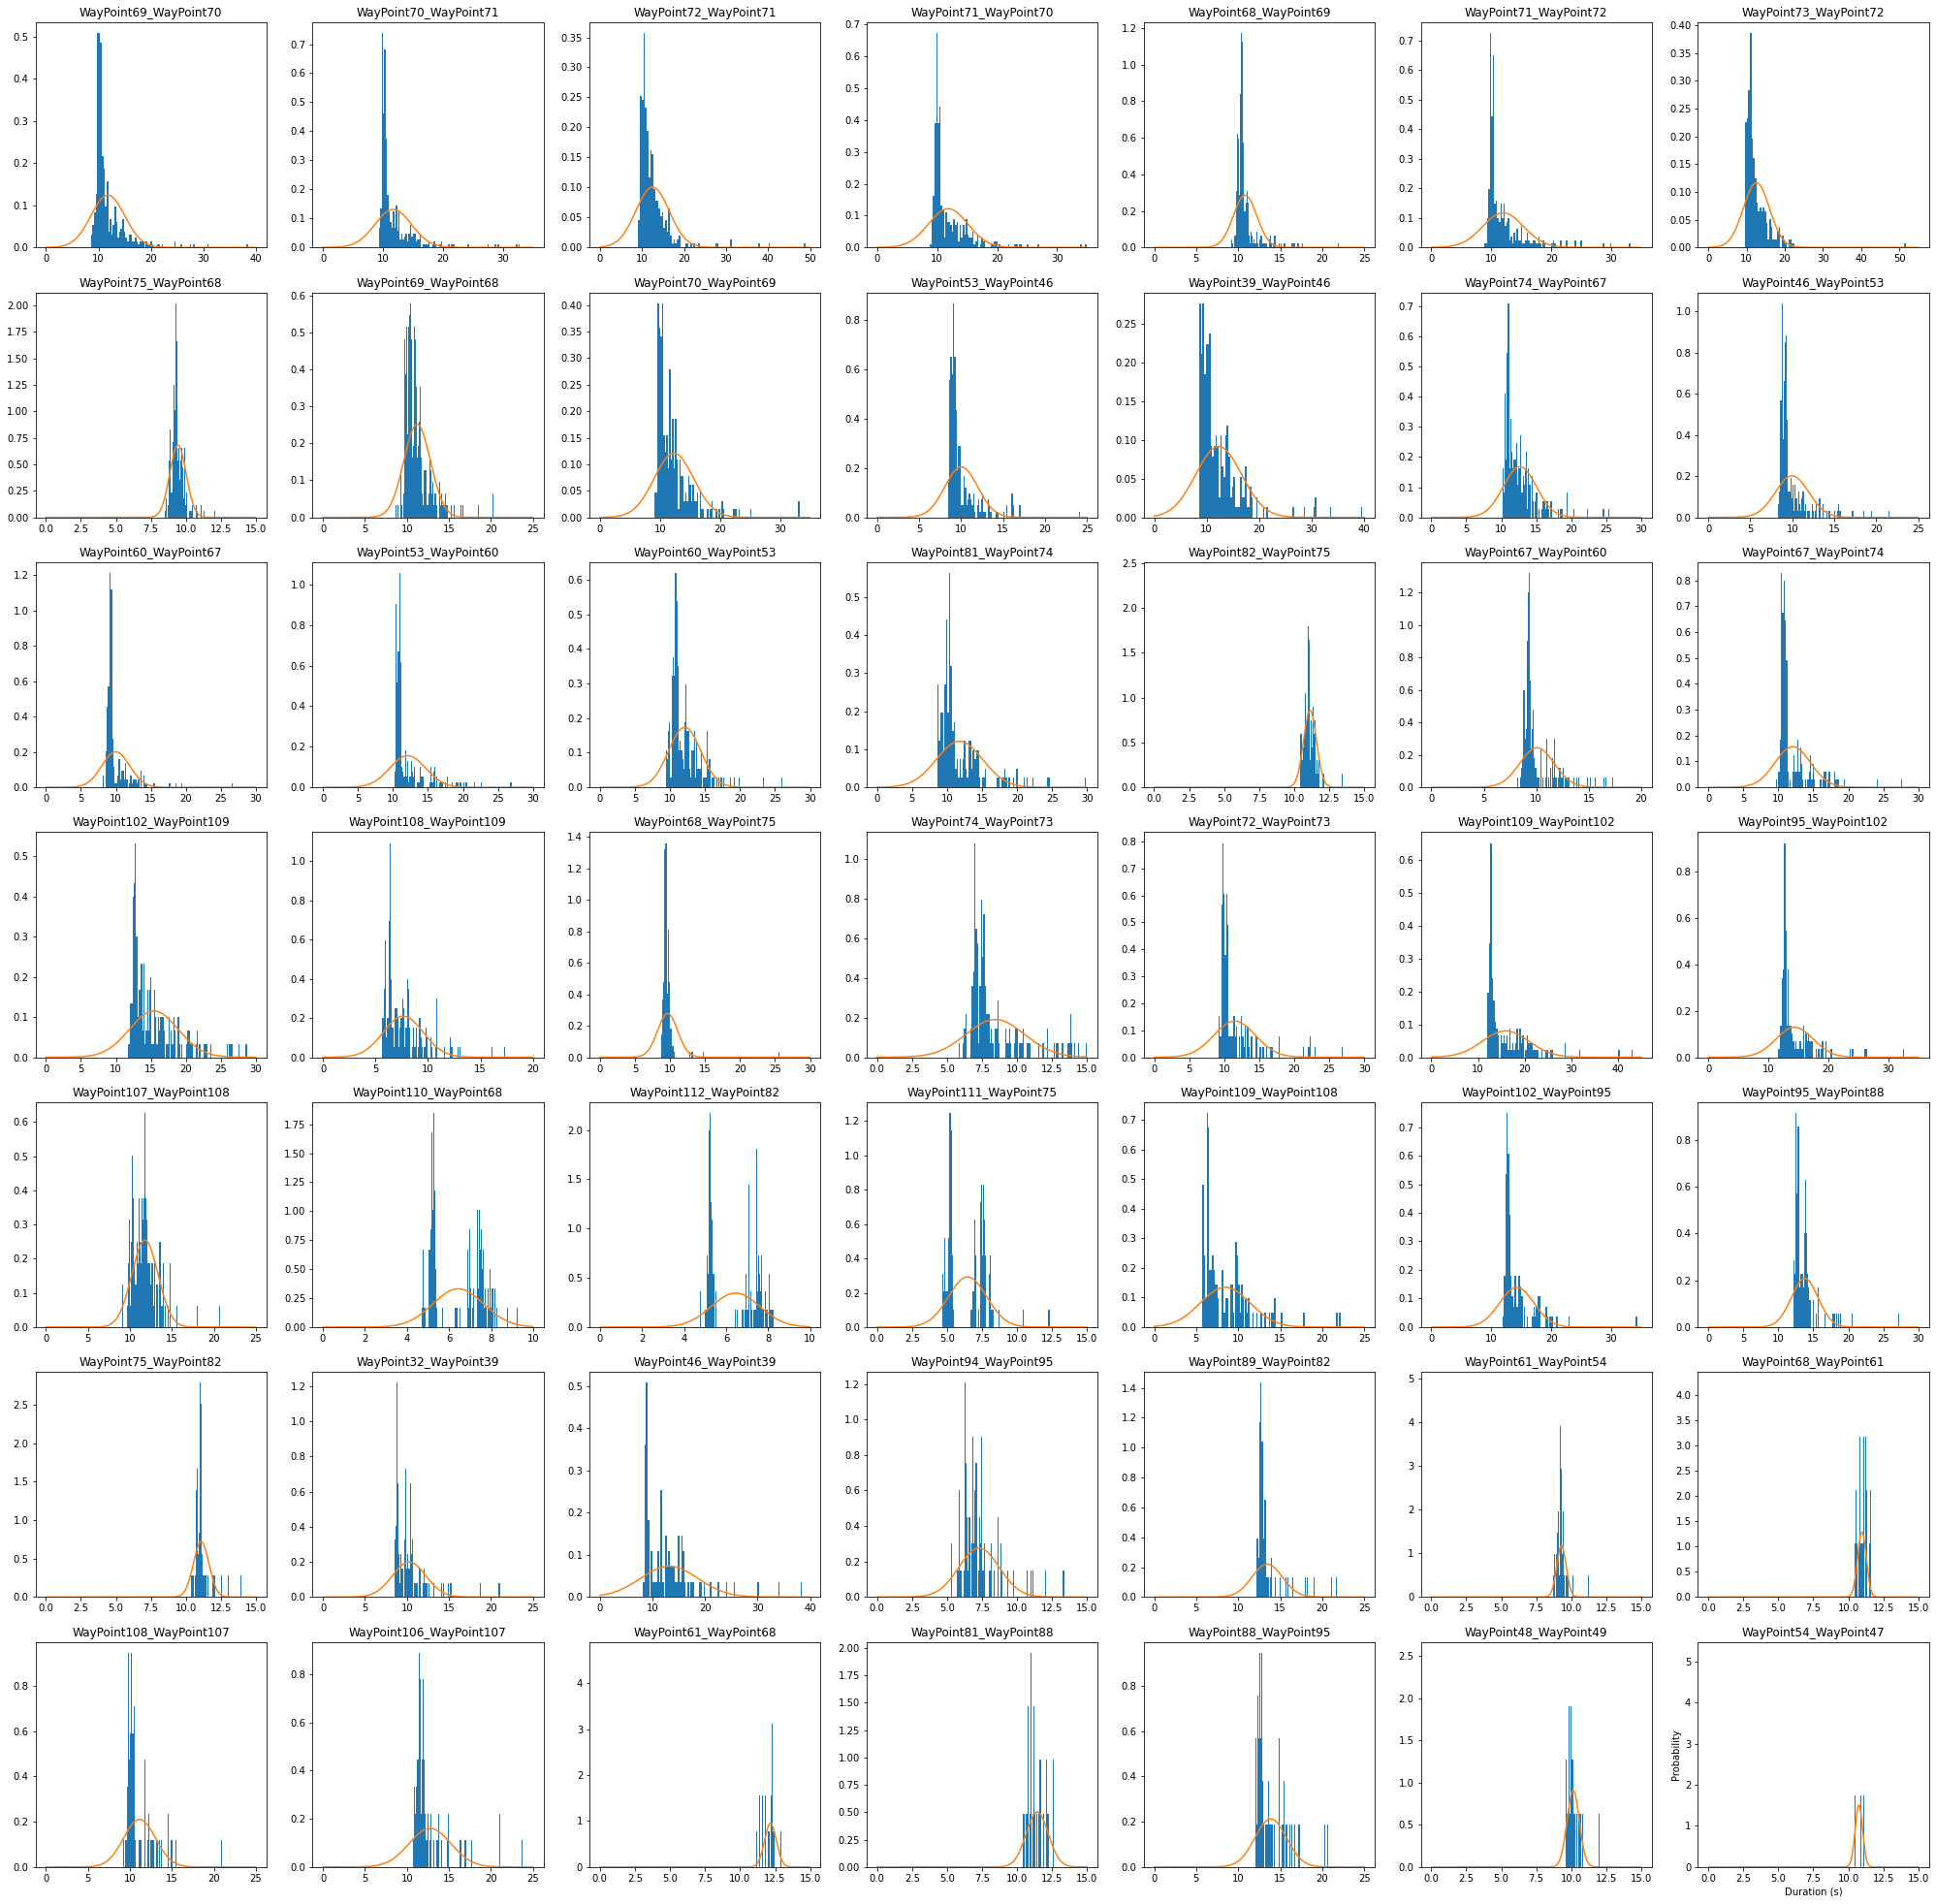

In [23]:
#plot duration distributions with the most data & fit to Gaussian
edge_plot_gaussian(df, count, n_rows = 7, n_cols = 7)

## 4b) Lognormal
- Fairly good fit, but underestimates the peak of the distribution
- Bad fit for the multimodal edges

'Done'

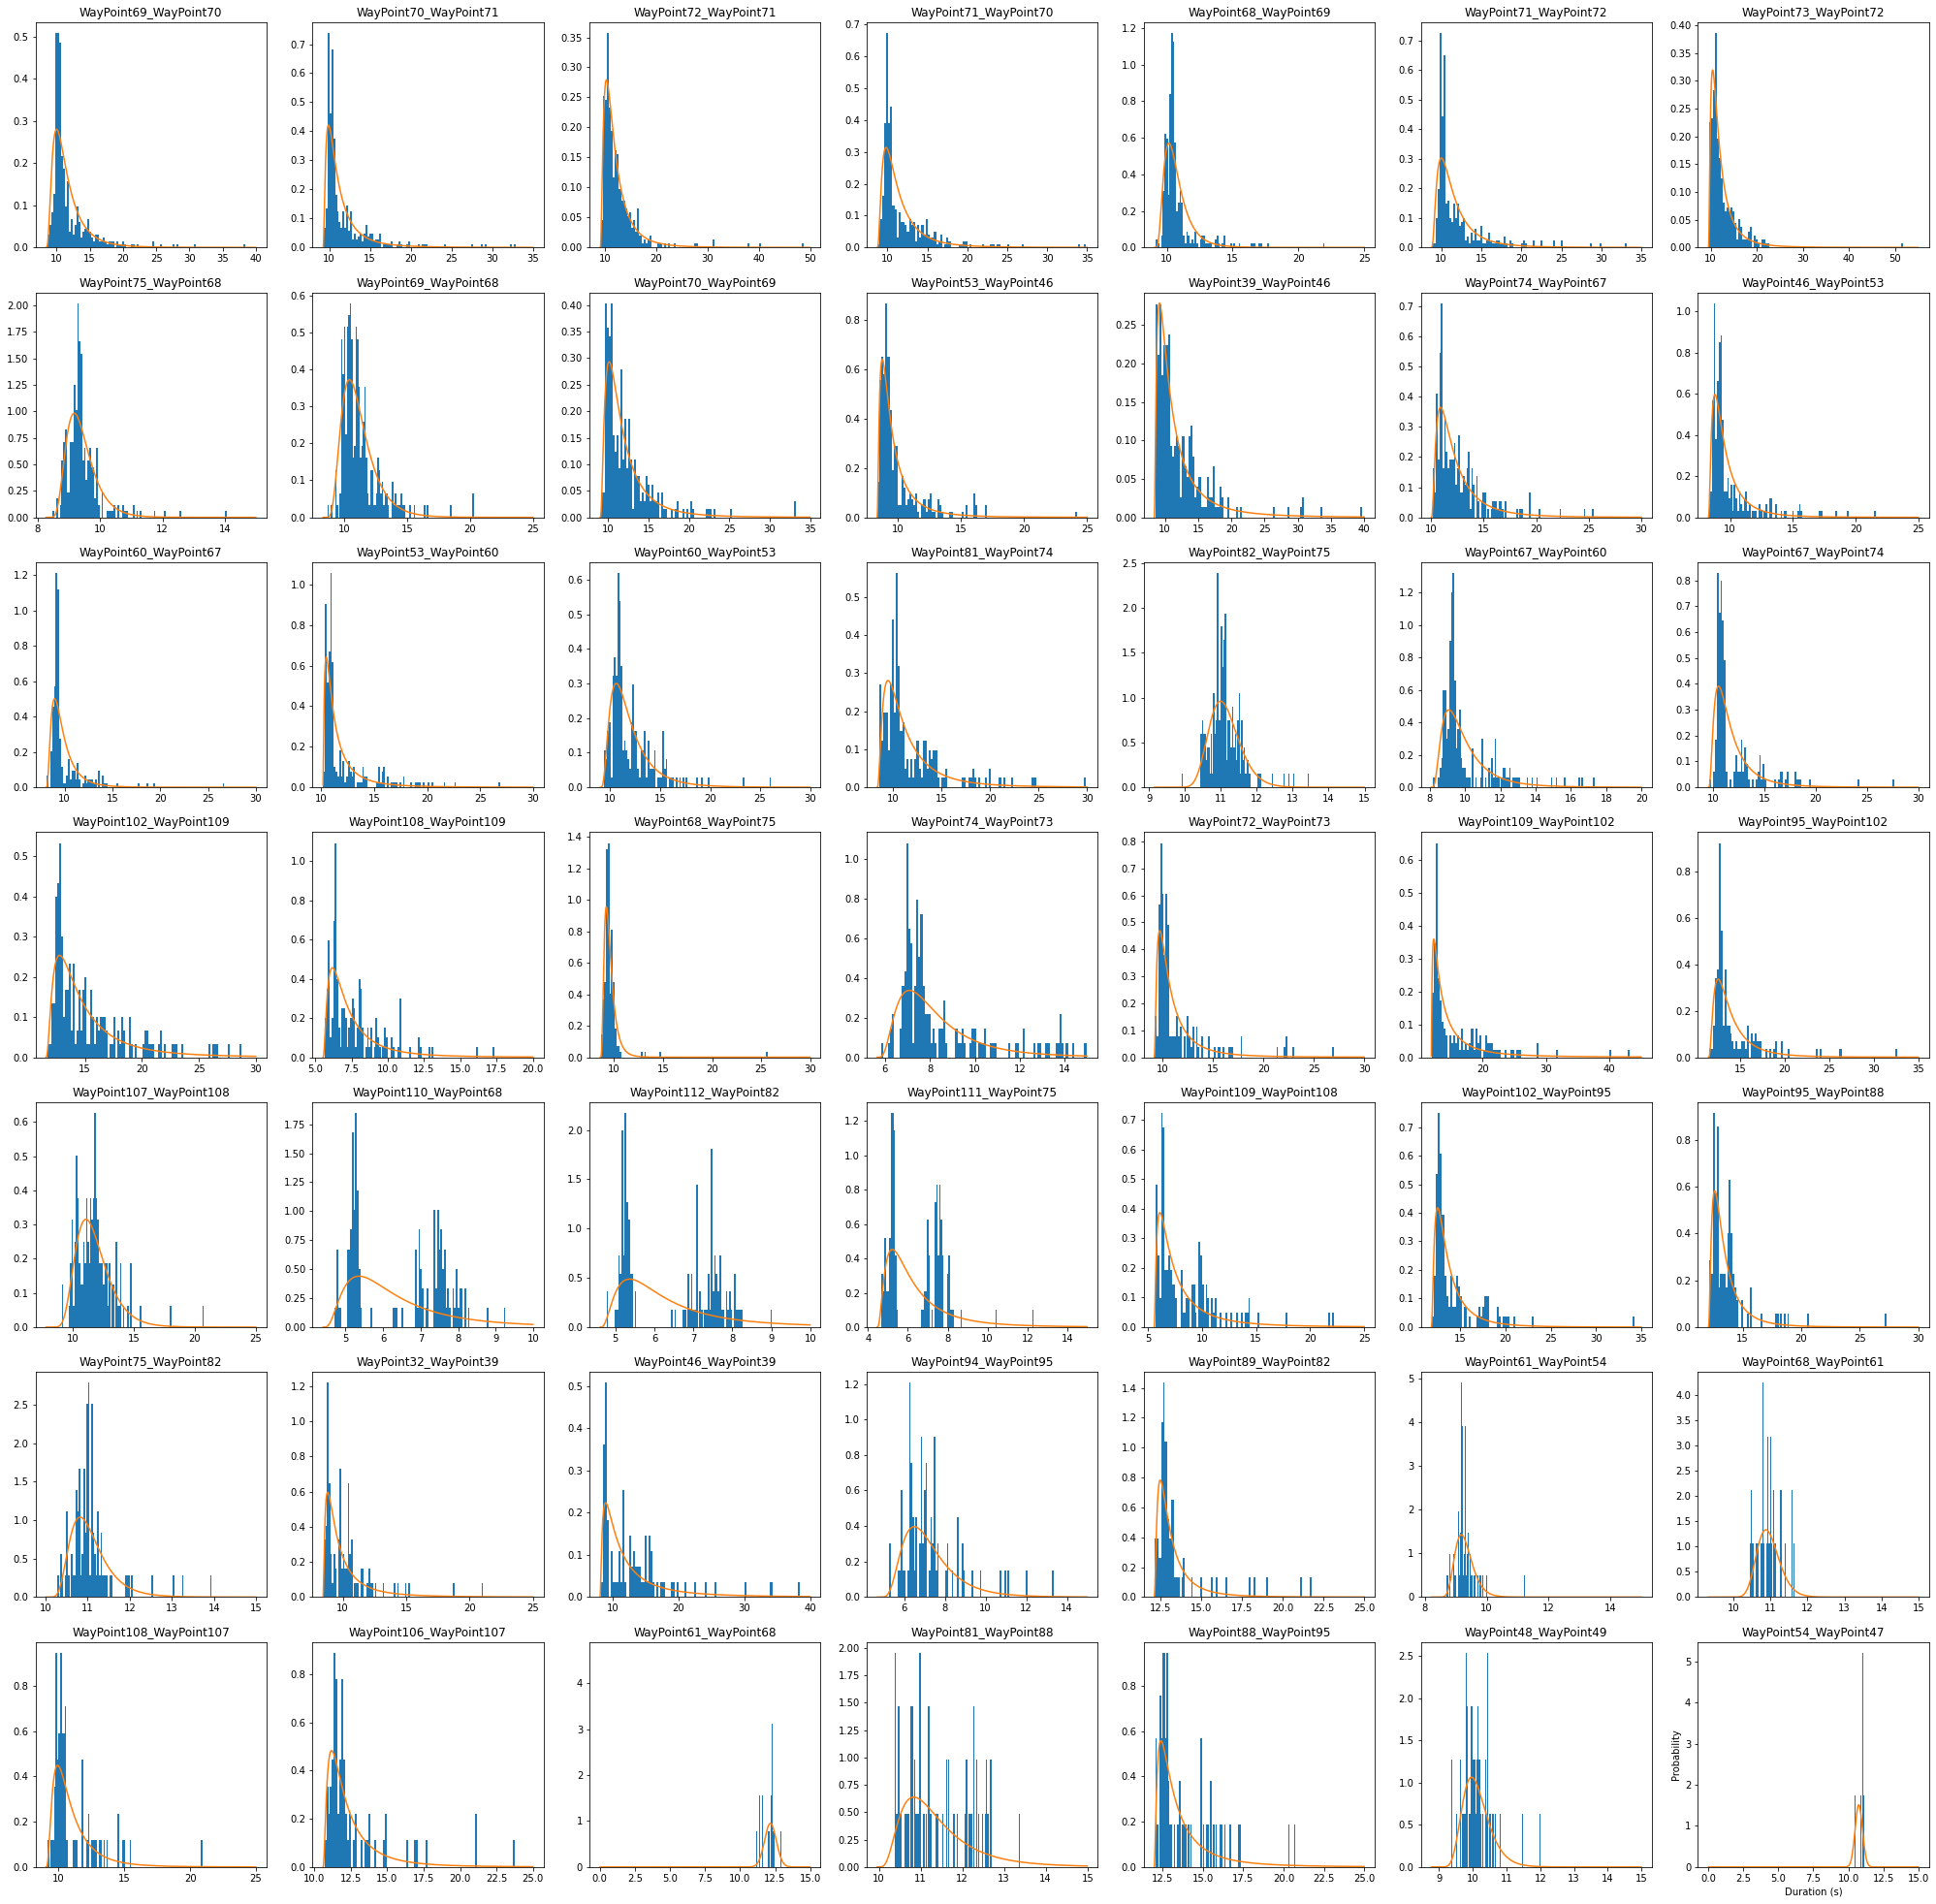

In [25]:
#plot duration distributions with the most data & fit to lognormal
edge_plot_lognormal(df, count, n_rows = 7, n_cols = 7)